# Data Acquisition

Getting MSCOCO data into the notebook instance.

Evaluate sample images.


```bash
mkdir data
cd data
mkdir images
cd images

wget -c http://images.cocodataset.org/zips/train2017.zip
wget -c http://images.cocodataset.org/zips/val2017.zip
wget -c http://images.cocodataset.org/zips/test2017.zip
wget -c http://images.cocodataset.org/zips/unlabeled2017.zip

unzip train2017.zip
unzip val2017.zip
unzip test2017.zip
unzip unlabeled2017.zip

rm train2017.zip
rm val2017.zip
rm test2017.zip
rm unlabeled2017.zip 

cd ../
wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
wget -c http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
wget -c http://images.cocodataset.org/annotations/image_info_test2017.zip
wget -c http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip

unzip annotations_trainval2017.zip
unzip stuff_annotations_trainval2017.zip
unzip image_info_test2017.zip
unzip image_info_unlabeled2017.zip

rm annotations_trainval2017.zip
rm stuff_annotations_trainval2017.zip
rm image_info_test2017.zip
rm image_info_unlabeled2017.zip
```

In [1]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached pycocotools-2.0.4-cp38-cp38-linux_x86_64.whl
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
from pycocotools.coco import COCO

In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [4]:
dataDir='data'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush

COCO supercategories: 
animal, food, appliance, furniture, indoor, sports, vehicle, outdoor, person, accessory, electronic, kitchen


In [7]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds);
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

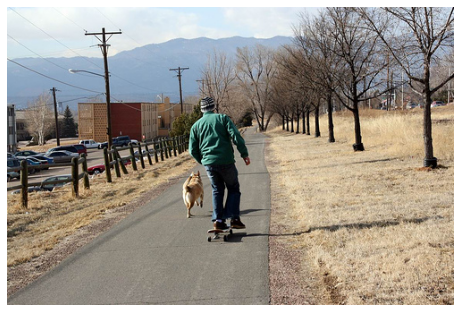

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

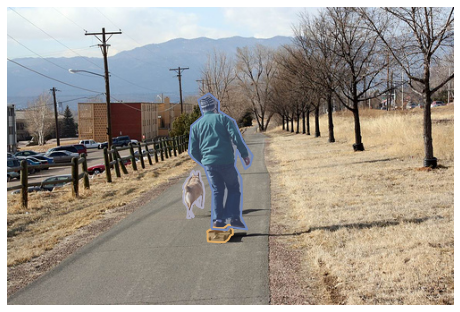

In [9]:
# load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [10]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=2.16s)
creating index...
index created!


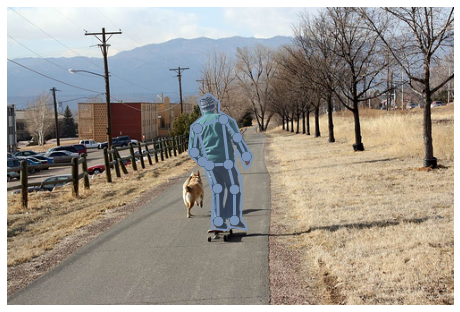

In [11]:
# load and display keypoints annotations
plt.imshow(I)
plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [12]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.87s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


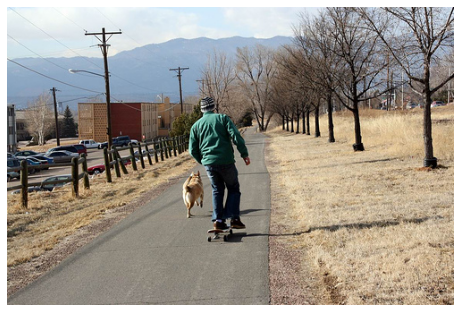

In [13]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()